## IEEE-CIS Fraud Detection

In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.

* Categorical Features - Transaction   
  ProductCD  
  card1 - card6  
addr1, addr2  
P_emaildomain  
R_emaildomain  
M1 - M9  
* Categorical Features - Identity  
DeviceType  
DeviceInfo  
id_12 - id_38  

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp). 

### 1. Data Exploration
데이터의 사이즈가 train, test 50만개 씩, 칼럼수도 400개 이상이다.  
na의 비율도 굉장히 많으므로 우리가 평소에 하던 interporlation도 어려운 경우가 많다.  
이럴 경우, 면밀한 데이터 분석은 무리라고 생각한다  

보통 na의 수가 많은 경우, 그 칼럼 자체를 소거하는 방향을 많이 사용한다.
하지만 이 데이터는 금융 데이터로, na자체가 데이터일 가능성도 다분히 존재한다.
### 2. Data Visualizaion
fraud 기준으로 간단한 시각화

### 3. Preprocessing
### 4. Classificaion Predict
pca로 변수량을 줄이거나   
auto training쪽으로 가는 것이 좋아보인다.

### 1. Data Exploration

In [3]:
# road Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action = 'ignore')

In [4]:
# road Data
train_tran = pd.read_csv("train_transaction.csv")
train_iden = pd.read_csv("train_identity.csv")

In [5]:
test_tran = pd.read_csv("test_transaction.csv")
test_iden = pd.read_csv("test_identity.csv")
sub_mission = pd.read_csv("sample_submission.csv")

In [5]:
train_tran.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_iden.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
print("train_identity shpae :", train_iden.shape)
print("train_trainsaction shpae :", train_tran.shape)

train_identity shpae : (144233, 41)
train_trainsaction shpae : (590540, 394)


In [9]:
print("test_identity shpae :", test_iden.shape)
print("test_trainsaction shpae :", test_tran.shape)

test_identity shpae : (141907, 41)
test_trainsaction shpae : (506691, 393)


In [21]:
# tranaction columns 종류
train_tran.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [20]:
# identity columns 종류
train_iden.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [30]:
# 칼럼 별 na 비율
print(train_iden.isna().sum()/train_iden.shape[0]*100)

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

In [39]:
# 칼럼 중 na비율
col_num = np.where(train_iden.isna().sum()>train_iden.shape[0]*0.5)
col_num = np.array(col_num)
col_num2 = np.where(train_tran.isna().sum()>train_tran.shape[0]*0.5)
col_num2 = np.array(col_num2)

print("train identity 중 na가 50% 이상인 경우 :", col_num.shape[1],"개")
print("train transaction 중 na가 50% 이상인 경우 :", col_num2.shape[1],"개")

train identity 중 na가 50% 이상인 경우 : 12 개
train transaction 중 na가 50% 이상인 경우 : 174 개


In [37]:
# transaction 총 na비율
print("columns na average number in train is" ,train_tran.isna().sum().sum()/(train_tran.shape[0]*train_tran.shape[1])*100)

columns na average number in train is 41.073431200111266


In [6]:
# Data Merge by TransactionID
train_x = train_tran.merge(train_iden, how = 'left', left_on = 'TransactionID', right_on = 'TransactionID')
test_x = test_tran.merge(test_iden, how = 'left', left_on = 'TransactionID', right_on = 'TransactionID')
print(train_x.shape)
print(test_x.shape)

(590540, 434)
(506691, 433)


In [7]:
# 기존 data 삭제
del test_iden, train_tran, test_tran, train_iden

In [8]:
print(train_x.shape)
print(test_x.shape)

(590540, 434)
(506691, 433)


Data size가 굉장히 큼과 동시에, na비율도 굉장히 많아 처리 및 시각화가 쉽지 않을 것을 알 수 있다.

## 2. Data Visualizaion

In [14]:
# 날짜별 시각화
train_x['DT_Day'] = train_x['TransactionDT'] // (24*60*60)
train_x['DT_Week'] = train_x['DT_Day'] %7

tran_day = train_x.groupby('DT_Day')['isFraud'].mean()
tran_week = train_x.groupby('DT_Week')['isFraud'].mean()

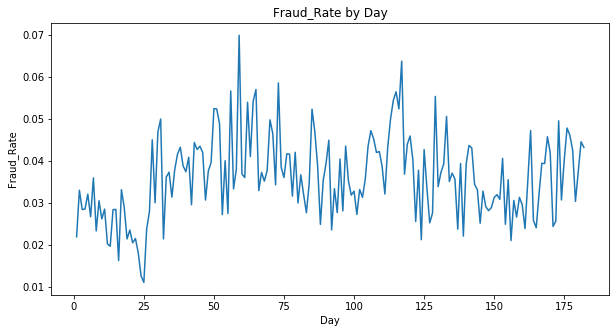

In [15]:

plt.figure(figsize=(10,5))
plt.xlabel("Day")
plt.ylabel("Fraud_Rate")
plt.title("Fraud_Rate by Day")
sns.lineplot(data = tran_day)

plt.show()

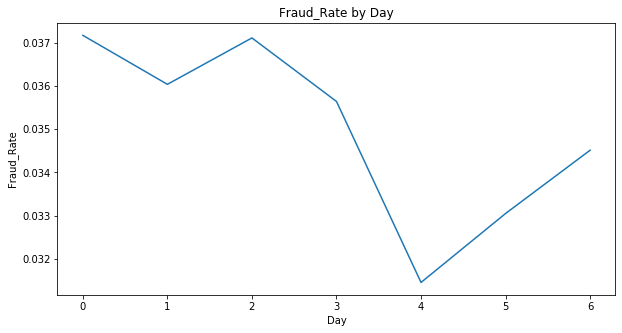

In [66]:
plt.figure(figsize=(10,5))
plt.xlabel("Day")
plt.ylabel("Fraud_Rate")
plt.title("Fraud_Rate by Day")
sns.lineplot(data = tran_week)

plt.show()

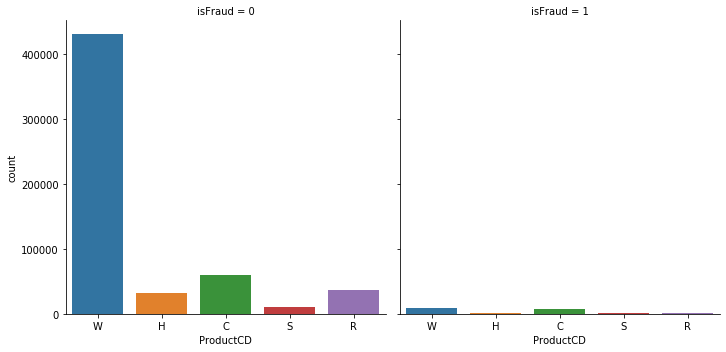

In [9]:
# fraud를 hue로 놓고 시각화 해보자
#ig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.catplot(x="ProductCD", col = "isFraud", kind= "count", data=train_x)
#sns.countplot(x="ProductCD", ax=ax[1], data=test_x)
#ax[1].set_title('ProductCD test', fontsize=14)
plt.show()

catplot이 이쁘고 직관적이지만, data가 무거워서 오래 걸린다.

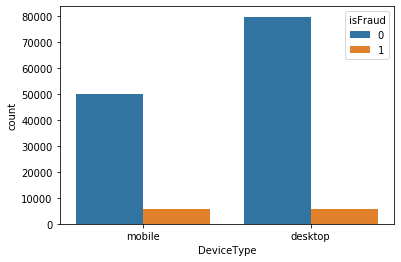

In [19]:
sns.countplot(x="DeviceType", hue = "isFraud", data = train_x)
plt.show()

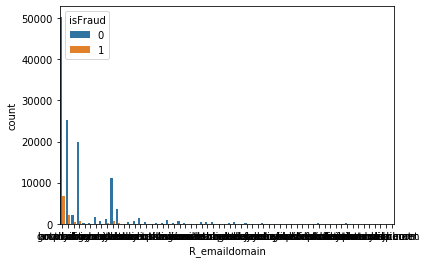

In [24]:
sns.countplot(x="R_emaildomain", hue = "isFraud", data = train_x)
plt.show()

데이터가 하도 커서 시각화 하기에 장애가 많다.

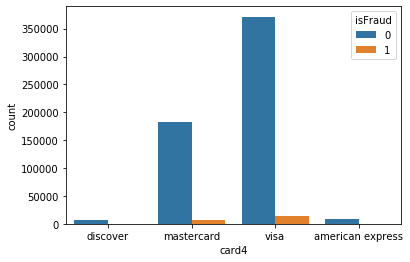

In [27]:
sns.countplot(x="card4", hue = "isFraud", data = train_x)
plt.show()

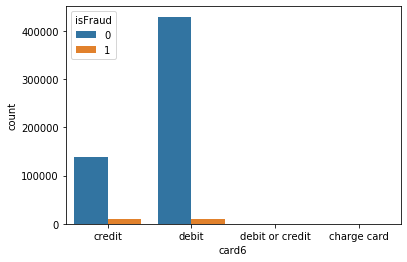

In [28]:
sns.countplot(x="card6", hue = "isFraud", data = train_x)
plt.show()

결론 : Data Unbalance 문제와 동시에, 칼럼이 너무 많아 의미 있는 시각화가 쉽지 않다.

## 3. Preprocessing

1. Caegory 변수가 너무 많고, 의미가 존재할 가능성이 있으므로 label encoding을 사용한다.
2. 정규화 과정을 만들어준다. - minmax가 가볍기 때문에 min max로 한다. 칼럼별로 log나 standard가 좋긴할테지만 무겁다.
3. na는 -0.3로 한다. 왜냐하면 0 이상의 값들을 가지고 있다. 그렇기에 na의 표시를 위해 -0.3로 할 것이다.

In [9]:
# train_y 만들어주기
train_y = train_x['isFraud']
train_y.shape

(590540,)

In [8]:
print(train_x.shape)
print(test_x.shape)

(590540, 434)
(506691, 433)


In [11]:
# Delete column
del_col = ['TransactionID', 'TransactionDT']

train_x.drop(del_col, axis = 1, inplace = True)
train_x.drop('isFraud', axis = 1 ,inplace = True)
test_x.drop(del_col, axis =1, inplace = True)

KeyError: "['TransactionID' 'TransactionDT'] not found in axis"

In [12]:
print(train_x.shape)
print(test_x.shape)

(590540, 431)
(506691, 431)


In [13]:
# category 변수 set
# https://www.kaggle.com/artgor/eda-and-models

cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']
cat_cols2 = ['id-12', 'id-13', 'id-14', 'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29',
            'id-30', 'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

In [14]:
from sklearn.preprocessing import LabelEncoder
# 카테고리 변수들안에 unique한 수 : 너무 많을 시 dummy화가 불가능하다는 의미이다.
print("%s의 category 종류 수 :%d"%(cat_cols[13], len(train_x[cat_cols[13]].unique())))
print("%s의 category 종류 수 :%d"%(cat_cols[-10], len(train_x[cat_cols[-10]].unique())))


id_25의 category 종류 수 :342
addr1의 category 종류 수 :333


In [15]:
for col,col2 in zip(cat_cols, cat_cols2):
    if col in train_x.columns:
        le = LabelEncoder()
        le.fit(list(train_x[col].astype(str).values) + list(test_x[col2].astype(str).values))
        train_x[col] = le.transform(list(train_x[col].astype(str).values))
        test_x[col2] = le.transform(list(test_x[col2].astype(str).values)) 

In [44]:
print("NA Data Number : %d"train_x.isna().sum().sum()

97719626

In [16]:
# min max시 na는 0으로 갈 것이다.
train_x.fillna(value = -0.3, inplace = True)
test_x.fillna(-0.3,inplace= True)


In [24]:
#min max scaler 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_x) # train_x에 fit을 해주어야 한다. train test 분할하여 할 시 같은 값이 다른 수치로 fit되기 때문이다.
train_x = min_max_scaler.transform(train_x)
test_x = min_max_scaler.transform(test_x)

In [22]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)

(590540, 431)
(506691, 431)
(590540,)


## Prediction

데이터 문제 중하나는 종속변수의 비율이 unbalance하다. 보통 이런 경우, 숫자가 적은 쪽을 늘려주거나 cross validation을 사용한다.  
cross validation인 k fold를 사용할 예정이다.  

고차원인 경우에는 svm이든 뭐든 다 안좋다.무의미한 feature가 너무 많기 때문이다.  
tree중에 알아서 feature selection을 해주는 것이 분석하는데 무리가 덜 할 것이며  
이러한 예로 boosting과 bagging이 있으며 그 중 유명한 xgboost를 사용할 것이다.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [25]:
# 출처 : https://www.kaggle.com/artkulak/ieee-fraud-simple-baseline-0-9383-lb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
EPOCHS = 3
kf = KFold(n_splits = EPOCHS, shuffle = True)
y_preds = np.zeros(sub_mission.shape[0])
y_oof = np.zeros(train_x.shape[0])
for tr_idx, val_idx in kf.split(train_x, train_y):
    clf = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        tree_method='hist'
    )
    
    X_tr, X_vl = train_x.iloc[tr_idx, :], train_x.iloc[val_idx, :]
    y_tr, y_vl = train_y.iloc[tr_idx], train_y.iloc[val_idx]
    clf.fit(X_tr, y_tr)
    y_pred_train = clf.predict_proba(X_vl)[:,1]
    y_oof[val_idx] = y_pred_train
    print('ROC AUC {}'.format(roc_auc_score(y_vl, y_pred_train)))
    
    y_preds+= clf.predict_proba(test_x)[:,1] / EPOCHS

ROC AUC 0.9430598663225636
ROC AUC 0.9363903934500062
ROC AUC 0.9343557668495402


In [35]:
sample_submission = sub_mission
sample_submission['isFraud'] = y_preds
sample_submission.to_csv('simple_xgboost.csv')

In [ ]:
## 후기
data 행이 많은건 몇번 다뤄봤지만, 이정도로 column이나 na가 지저분한 데이터는 사실 만져본 적이 없었다.
중요행을 파악하기도 힘들 뿐더러, category 변수의 숫자와 그 안에 string data도 너무 많았다.

남들의 notebook을 참고하고 싶지 않았지만, 코딩의 구현이 어려워 많은 힘을 빌렸다.

동시에, 기존에 방식처럼 깔끔하고 직관적인 변수선택 및 시각화가 어려울 경우,
알고리즘의 힘을 빌리는 것은 나쁘지 않은 선택일